In [17]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression

df = pd.read_csv('./main_df (1).csv')

In [18]:
df.head(5)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change
0,1190,NE,Severe Storm(s),1997.0,11.0,13002,Financial Managers,3730.0,24.50,50960,71.5,71.5,71.6,-0.1,-43864.800
1,1190,NE,Severe Storm(s),1997.0,11.0,13005,"Personnel, Training, and Labor Relations Managers",1420.0,21.41,44540,71.5,71.5,71.6,-0.1,-14593.056
2,1190,NE,Severe Storm(s),1997.0,11.0,13008,Purchasing Managers,1300.0,18.76,39030,71.5,71.5,71.6,-0.1,-11706.240
3,1190,NE,Severe Storm(s),1997.0,11.0,13011,"Marketing, Advertising, and Public Relations M...",3380.0,23.06,47970,71.5,71.5,71.6,-0.1,-37412.544
4,1190,NE,Severe Storm(s),1997.0,11.0,13014,Administrative Services Managers,2060.0,19.43,40410,71.5,71.5,71.6,-0.1,-19212.384


In [19]:
#df.loc[df['occ_code'] == '13000']

In [20]:
df.isnull().sum().sum()

0

### creating a columns with specific business type

In [21]:
df['Business_type']= df['occ_code'].apply(lambda x : x[:2])
#pd.set_option('display.max_row()',None)
industry = {
        '13' :'Business and Financial Operations',
        '15' :'Computer and Mathematical',
        '17' :'Architecture and Engineering',
        '19' :'Life, Physical, and Social Science',
        '21' :'Community and Social Service',
        '23' :'Legal',
        '25' :'Educational Instruction and Library',
        '27' :'Arts, Design, Entertainment, Sports, and Media',
        '29' :'Healthcare Practitioners and Technical',
        '31' :'Healthcare Support',
        '33' :'Protective Service',
        '35' :'Food Preparation and Serving Related',
        '37' :'Building and Grounds Cleaning and Maintenance',
        '39' :'Personal Care and Service',
        '41' :'Sales and Related',
        '43' :'Office and Administrative Support',
        '45' :'Farming, Fishing, and Forestry',
        '47' :'Construction and Extraction',
        '49' :'Installation, Maintenance, and Repair',
        '51' :'Production',
        '53' :'Transportation and Material Moving'}
df['Business_type'].replace(industry, inplace = True)

In [22]:
df['Business_type'].head(2)

0    Business and Financial Operations
1    Business and Financial Operations
Name: Business_type, dtype: object

In [23]:
df.head(2)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change,Business_type
0,1190,NE,Severe Storm(s),1997.0,11.0,13002,Financial Managers,3730.0,24.50,50960,71.5,71.5,71.6,-0.1,-43864.800,Business and Financial Operations
1,1190,NE,Severe Storm(s),1997.0,11.0,13005,"Personnel, Training, and Labor Relations Managers",1420.0,21.41,44540,71.5,71.5,71.6,-0.1,-14593.056,Business and Financial Operations


In [24]:
df_con = df.loc[df['Business_type']=='Construction and Extraction',:].copy()

In [25]:
df_con.head(2)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change,Business_type
44189,1360,MS,Severe Storm(s),2001.0,2.0,47-0000,Construction and Extraction Occupations,53020.0,12.88,26790,59.0,59.2,58.7,0.5,1638954.24,Construction and Extraction
44190,1360,MS,Severe Storm(s),2001.0,2.0,47-1011,First-Line Supervisors/Managers of Constructio...,4710.0,19.60,40770,59.0,59.2,58.7,0.5,221558.40,Construction and Extraction


In [26]:
df_con['state'].value_counts(normalize = True).head(5)

CA    0.119666
TX    0.097359
OK    0.060655
WA    0.045643
FL    0.037650
Name: state, dtype: float64

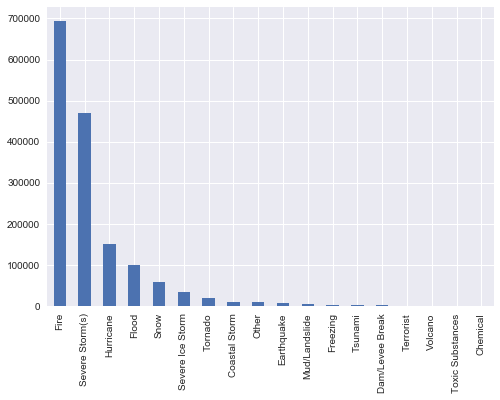

In [27]:
df.incidentType.value_counts().plot(kind='bar')
plt.savefig('yem')

### choising a specific busness type

In [28]:
years = df_con['year'].astype(int) 
months = df_con['month'].astype(int)
df_con['date'] = years.astype(str) + '-' + months.astype(str)
df_con['date'] = pd.to_datetime(df_con['date'])
df_date = df_con[['date','employment_rate_before']]
df_date.head()

,date,employment_rate_before
44189,2001-02-01,59.2
44190,2001-02-01,59.2
44191,2001-02-01,59.2
44192,2001-02-01,59.2
44193,2001-02-01,59.2


In [29]:
df_con['date'].max()

Timestamp('2018-12-01 00:00:00')

In [30]:
df_con['date'] = df_con['date'].astype('datetime64[ns]').copy()

In [31]:
df_date = df_con[['date','wage_change']]
df_date.head(2)

,date,wage_change
44189,2001-02-01,1638954.24
44190,2001-02-01,221558.40


In [32]:
df_con['date'].dtype

dtype('<M8[ns]')

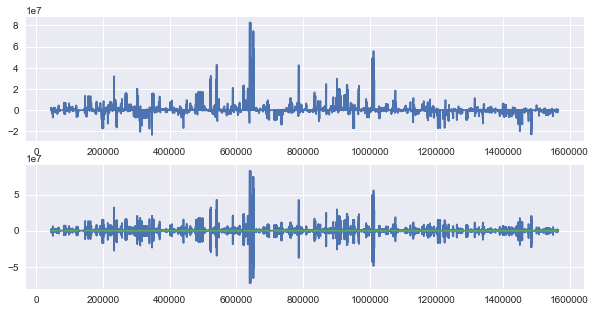

In [33]:
fig ,axes = plt.subplots(nrows =2, figsize=(10,5))
axes[0].plot(df_date['wage_change'])
axes[1].plot(df_date['wage_change'].diff())
axes[1].plot(df_date['wage_change'].pct_change())


#fig, axes = plt.subplots(nrows=3, figsize=(15,12))
#axes[0].plot(df['Close'])
#axes[1].plot(df['Close'].diff())
#axes[2].plot(df['Close'].pct_change())
plt.savefig('dis')

In [34]:
#plot_series(df_date, ['wage_change'], title = 'employement rate', step = 3)
#plt.xticks(df_date['date'],fontsize=18)

In [344]:
df_date['wage_change'].sum()

4802531964.960011

In [16]:
sns.distplot(df_date['wage_change'])
plt.figure(figsize =(20,20))
plt.savefig('pres')

NameError: name 'df_date' is not defined

In [320]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [321]:
#decomp = seasonal_decompose(df_date['wage_change'])
#decomp.plot()

### Modeling

### variables into consideration

In [322]:
df_mod = df.loc[(df['Business_type']=='Installation, Maintenance, and Repair')|(df['Business_type']=='Sales and Related') ,:].copy()

In [323]:
df_mod['Business_type'].value_counts()

Installation, Maintenance, and Repair    102564
Sales and Related                         48742
Name: Business_type, dtype: int64

In [324]:
#def replace(element):
 #   for i in element:
 ##       if i == 'Installation, Maintenance, and Repair':
 #           return i == 0
  #      else :
  #          return i == 1

In [325]:
#df_mod['Business_type'].map(replace)
#df_mod

In [326]:
boole = {'Installation, Maintenance, and Repair':1,
         'Sales and Related' : 0}
df_mod['Business_type'].rename(boole, inplace= True)
df_mod['Business_type'].value_counts()

Installation, Maintenance, and Repair    102564
Sales and Related                         48742
Name: Business_type, dtype: int64

In [327]:
df_mod['Business_type'].value_counts()

Installation, Maintenance, and Repair    102564
Sales and Related                         48742
Name: Business_type, dtype: int64

In [328]:
df_mod['Business_type'] = [ 1 if i == 'Installation, Maintenance, and Repair' else 0 for i in df_mod['Business_type']]
df_mod['Business_type'].value_counts()

1    102564
0     48742
Name: Business_type, dtype: int64

In [329]:
business = {'Business_type': 'impact_on_business'}
df_mod.rename( columns = business , inplace = True)

In [337]:
df_mod.head(2)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change,impact_on_business
160,1190,NE,Severe Storm(s),1997.0,11.0,41002,First-Line Supervisors and Managers/Supervisor...,10980.0,14.29,29720,71.5,71.5,71.6,-0.1,-75314.016,0
170,1190,NE,Severe Storm(s),1997.0,11.0,49002,Sales Engineers,360.0,26.54,55210,71.5,71.5,71.6,-0.1,-4586.112,1


In [338]:
df_mod.to_csv('./model.csv',index = False )

In [339]:
dummy_df1 = pd.get_dummies(df_mod['state'],)
dummy_df2 = pd.get_dummies(df_mod['incidentType'])
dummy_df3 = pd.get_dummies(df_mod['incidentType'])
pc_df = pd.concat([df_mod,dummy_df1,dummy_df2,dummy_df3], axis=1)
#pc_df = pd.append(df_mod,dummy_df1, dummy_df2, dummy_df3 , left_index=False, right_index=false, how='left')

In [340]:
pc_df.head(2)

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change,impact_on_business,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Chemical,Coastal Storm,Dam/Levee Break,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Volcano,Chemical,Coastal Storm,Dam/Levee Break,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Volcano
160,1190,NE,Severe Storm(s),1997.0,11.0,41002,First-Line Supervisors and Managers/Supervisor...,10980.0,14.29,29720,71.5,71.5,71.6,-0.1,-75314.016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
170,1190,NE,Severe Storm(s),1997.0,11.0,49002,Sales Engineers,360.0,26.54,55210,71.5,71.5,71.6,-0.1,-4586.112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [341]:
pc_df.shape

(151306, 103)

In [342]:
pc_df.to_csv('./pc_df.csv',index = False )

#### Comparative approach on regression 

In [343]:
from sklearn.linear_model import LinearRegression

disasterNumber	state	incidentType	year	month	occ_code	
occ_title	tot_emp	h_mean	a_mean	employment_rate_during	
employment_rate_before	employment_rate_after
employment_rate_change	wage_change	Business_type

In [37]:
df_mod2 = df.loc[(df['Business_type']=='Arts, Design, Entertainment, Sports, and Media') ,:].copy()                                                                
                                                                                   

In [38]:
df_mod2

,disasterNumber,state,incidentType,year,month,occ_code,occ_title,tot_emp,h_mean,a_mean,employment_rate_during,employment_rate_before,employment_rate_after,employment_rate_change,wage_change,Business_type
80,1190,NE,Severe Storm(s),1997.0,11.0,27102,"Economists, Including Market Research Analysts",390.0,22.70,47220,71.5,71.5,71.6,-0.1,-4249.440,"Arts, Design, Entertainment, Sports, and Media"
81,1190,NE,Severe Storm(s),1997.0,11.0,27105,Urban and Regional Planners,90.0,18.11,37660,71.5,71.5,71.6,-0.1,-782.352,"Arts, Design, Entertainment, Sports, and Media"
82,1190,NE,Severe Storm(s),1997.0,11.0,27108,Psychologists,430.0,20.71,43070,71.5,71.5,71.6,-0.1,-4274.544,"Arts, Design, Entertainment, Sports, and Media"
83,1190,NE,Severe Storm(s),1997.0,11.0,27199,All Other Social Scientists,200.0,20.42,42480,71.5,71.5,71.6,-0.1,-1960.320,"Arts, Design, Entertainment, Sports, and Media"
84,1190,NE,Severe Storm(s),1997.0,11.0,27302,"Social Workers, Medical and Psychiatric",1210.0,13.47,28020,71.5,71.5,71.6,-0.1,-7823.376,"Arts, Design, Entertainment, Sports, and Media"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565552,5053,TX,Fire,2014.0,5.0,27-4014,Sound Engineering Technicians,430.0,24.59,51140,61.6,61.6,61.6,0.0,0.000,"Arts, Design, Entertainment, Sports, and Media"
1565553,5053,TX,Fire,2014.0,5.0,27-4021,Photographers,3330.0,16.06,33400,61.6,61.6,61.6,0.0,0.000,"Arts, Design, Entertainment, Sports, and Media"
1565554,5053,TX,Fire,2014.0,5.0,27-4031,"Camera Operators, Television, Video, and Motio...",1280.0,23.10,48050,61.6,61.6,61.6,0.0,0.000,"Arts, Design, Entertainment, Sports, and Media"
1565555,5053,TX,Fire,2014.0,5.0,27-4032,Film and Video Editors,760.0,21.49,44690,61.6,61.6,61.6,0.0,0.000,"Arts, Design, Entertainment, Sports, and Media"


In [39]:
pc_mod2.to_csv('./sport.csv',index = False )

NameError: name 'pc_mod2' is not defined